 ### **Introduction/Problem Statement:**

In the competitive landscape of retail, optimizing sales prices is crucial for businesses to remain profitable and sustainable. Winny Stores, a leading retail chain, faces the challenge of accurately predicting volume of sales for its diverse range of products across multiple outlets. The purpose of this project is to develop a predictive model that can forecast volume of sales based on various attributes such as item weight, type, visibility, and outlet characteristics.


 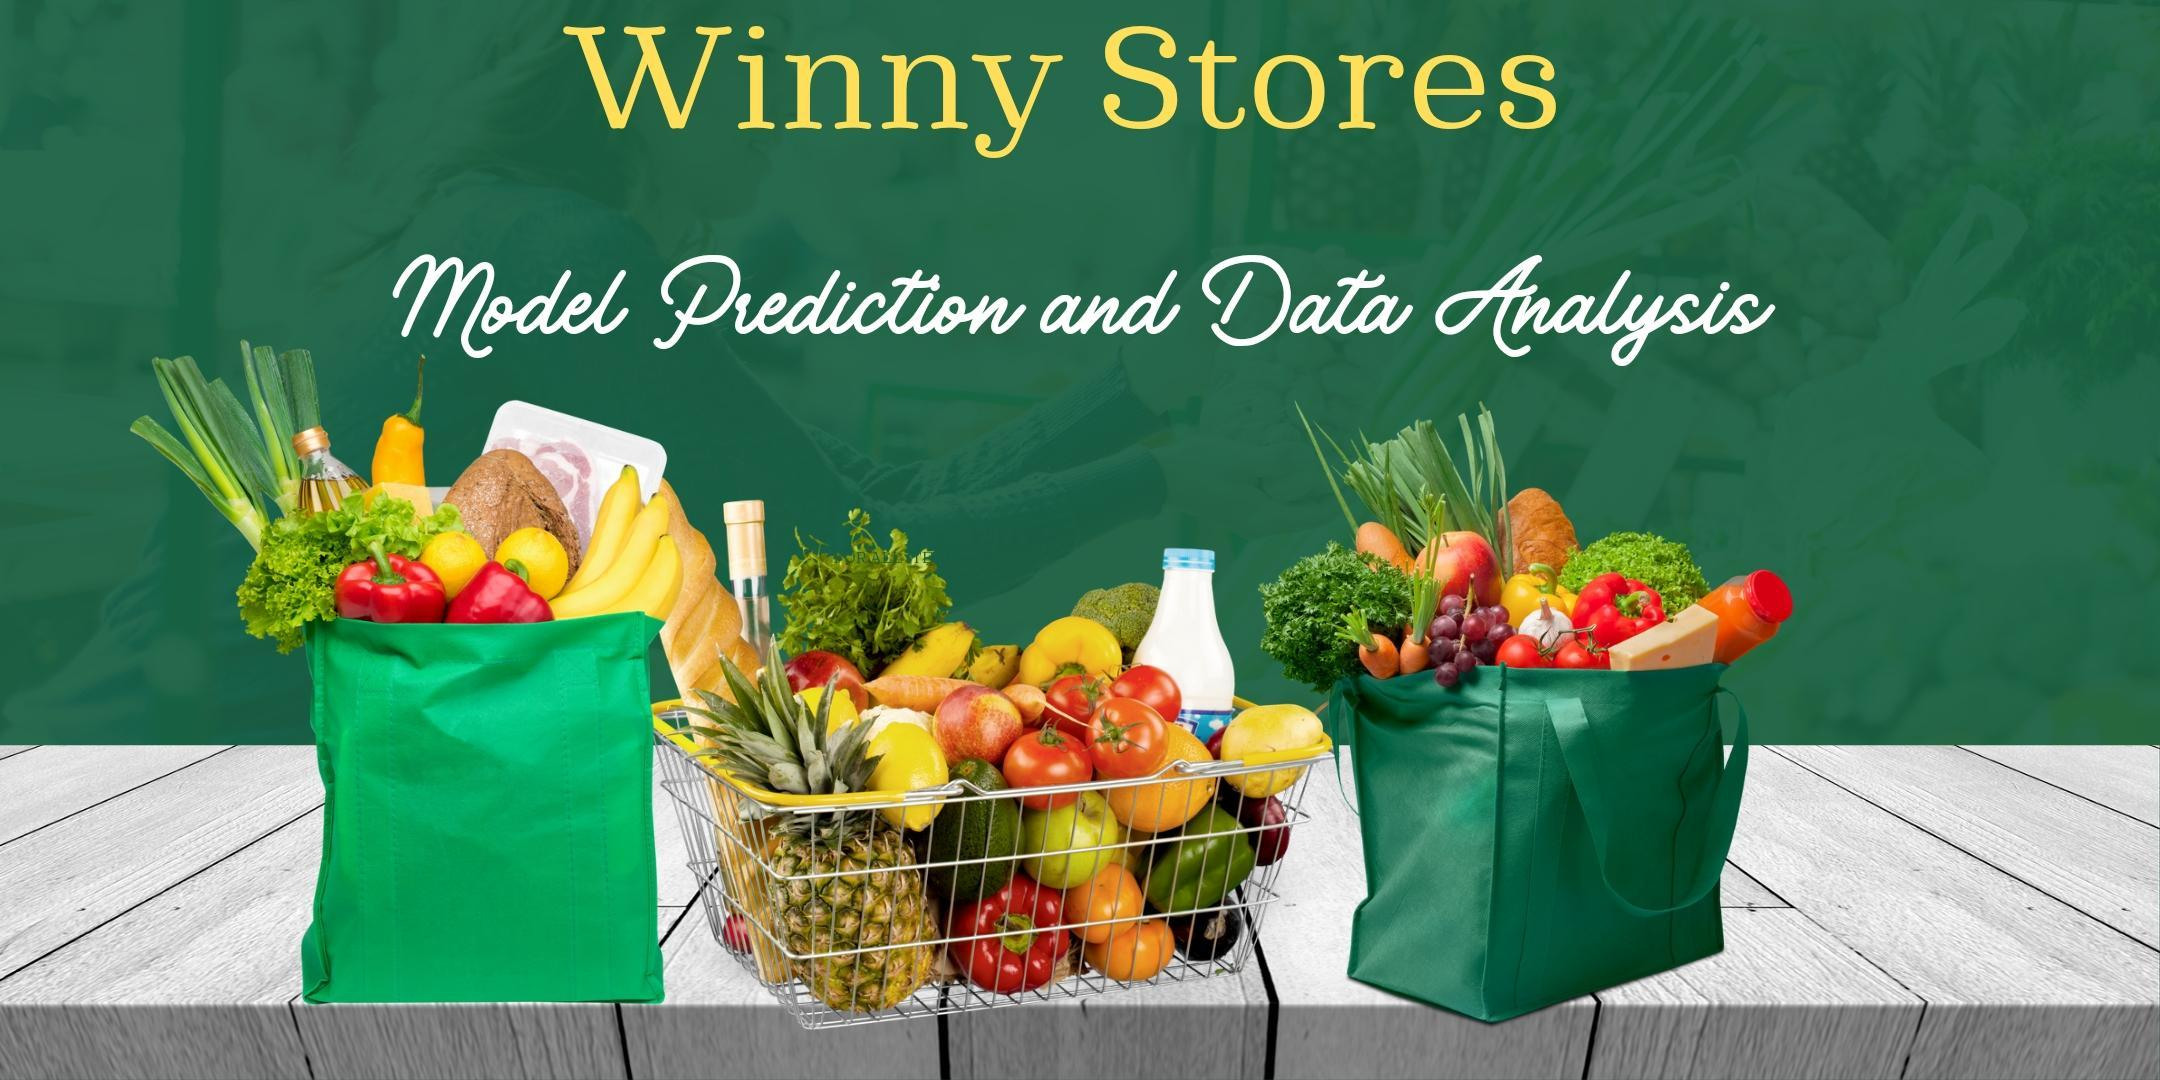


This model aims to provide Winny Stores with actionable insights to enhance decision-making processes in several key areas:

Based on this inputs from the data we can predict sales for productrestocking , price optimization and drive our marketing and promotion efforts.









# **About Data**

**Item_Identifier:** Unique identifier for each item.

**Item_Weight:** Weight of the item (in units specified by the dataset).

**Item_Fat_Content:** Indicates the fat content of the item (e.g., 'Low Fat', 'Regular').

**Item_Visibility:** The percentage of total display area of all products in a store allocated to the particular item.

**Item_Type:** Category/type of the item (e.g., 'Dairy', 'Frozen Foods').

**Item_MRP:** Minimum retail price (MRP) of the item.

**Outlet_Identifier:** Unique identifier for each outlet/store.

**Outlet_Establishment_Year:** The year in which the outlet was established.

**Outlet_Size:** Size of the outlet (e.g., 'Small', 'Medium', 'High')

**Outlet_Location_Type:** Type of location where the outlet is situated (e.g., 'Tier 1', 'Tier 2', 'Tier 3').

**Outlet_Type:** Type of outlet (e.g., 'Supermarket Type1', 'Grocery Store').

**Item_Outlet_Sales:** Sales generated from the item in the respective outlet (target variable).

**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Read Data**

In [ ]:
train = pd.read_csv('/content/Train 1.csv')
#test = pd.read_csv('/content/Test.csv')

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# **EDA**

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

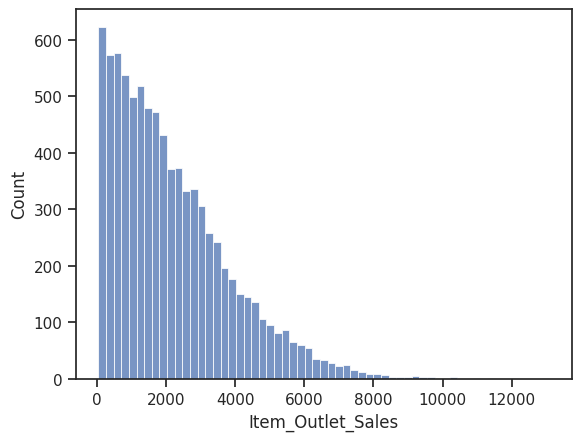

In [ ]:
sns.histplot(train['Item_Outlet_Sales'])

From the histogram we can observe that the distribution of outlet sales is right skewed suggesting that the majority of sales is from the lower range.

<ipython-input-322-56e4648d0ef8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix =train.corr()


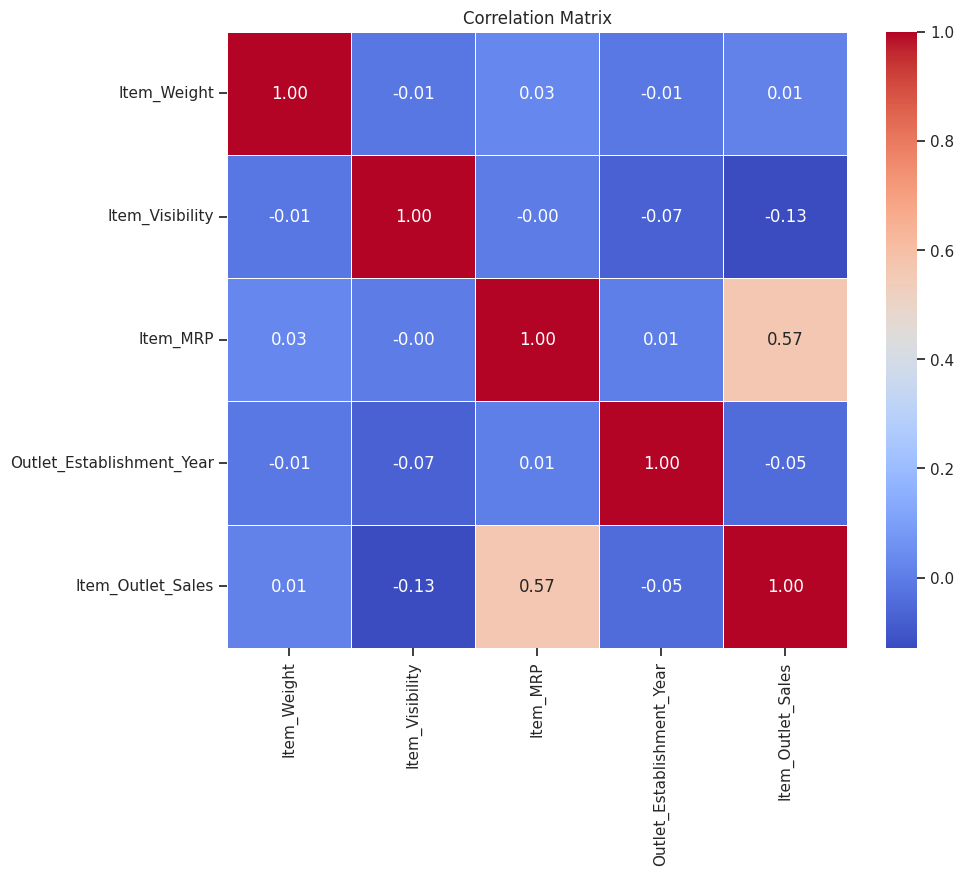

In [ ]:
correlation_matrix =train.corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

We can observe a notable correlation of 0.57 between Item_MRP and outlet sales. This indicates a moderate positive relationship, suggesting that higher item prices correspond to increased sales, but let's not jump to conclusions. Correlation isn't the same as causation.

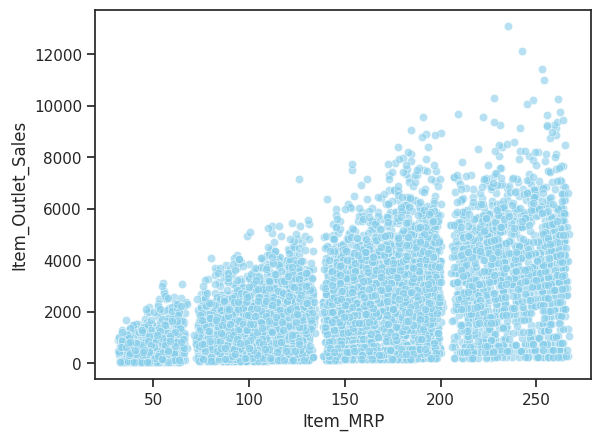

In [ ]:
sns.set_theme(style="ticks")

sns.scatterplot(data=train, x="Item_MRP", y="Item_Outlet_Sales", color="skyblue", marker='o', alpha=0.6)
#sns.lineplot(data=df, x="Item_MRP", y="Item_Outlet_Sales", color="purple")
#plt.title('Correlation between income and gdpp')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

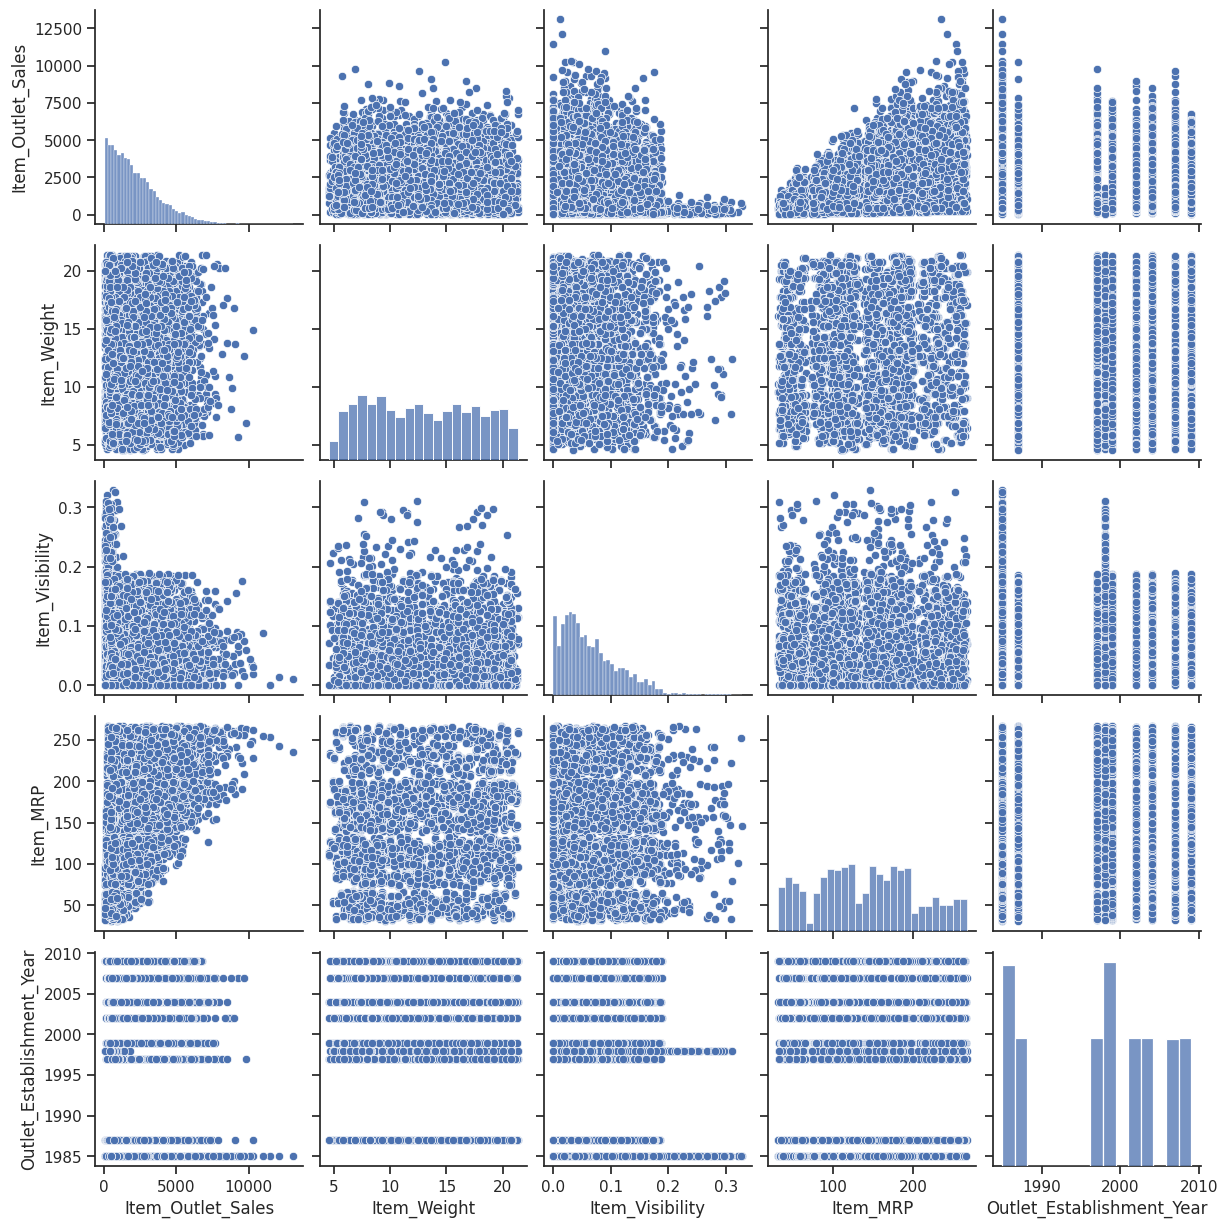

In [ ]:
numerical_vars = ['Item_Outlet_Sales','Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
sns.pairplot(train[numerical_vars], height=2.5 )
plt.show()

Building upon our previous observation of correlation, the plot detailing 'Item_MRP' against 'Item_Outlet_Sales' unveils a compelling narrative.
We observe towards the lower end of the data points, we witness a subtle yet distinct rise, reminiscent of the characteristic curve of an exponential function.

Something interesting to note is that an item with higher visibility doesn't always translate to higher sales.

Item weight Distribution

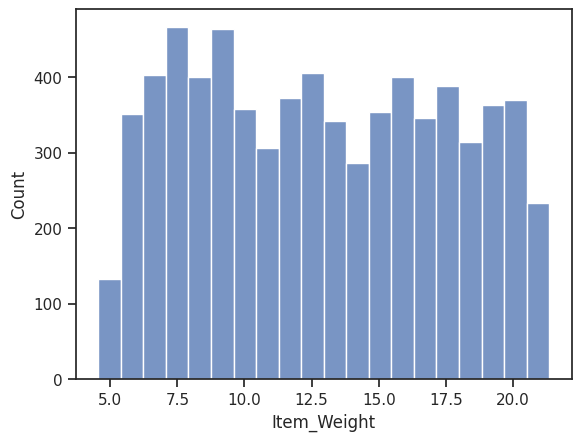

In [ ]:
sns.histplot(train['Item_Weight'])
plt.show()

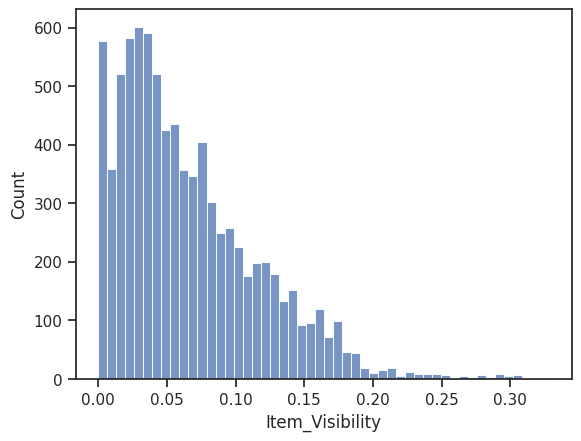

In [ ]:
sns.histplot(train['Item_Visibility'])
plt.show()

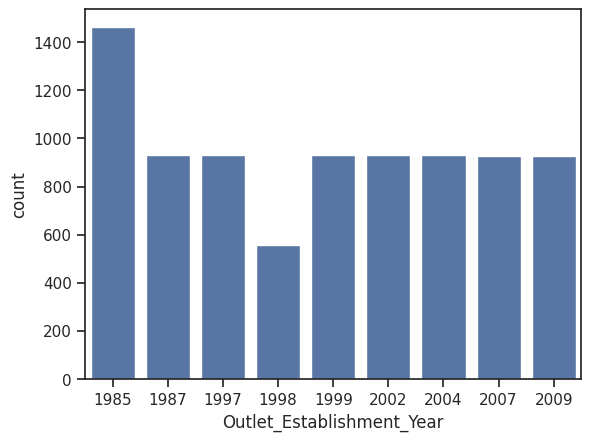

In [ ]:
sns.countplot(x='Outlet_Establishment_Year', data=train)
plt.show()

**INSIGHT:**It Can be seen that more products were sold in 1985,less in 1998 and same number of products were sold in other years.

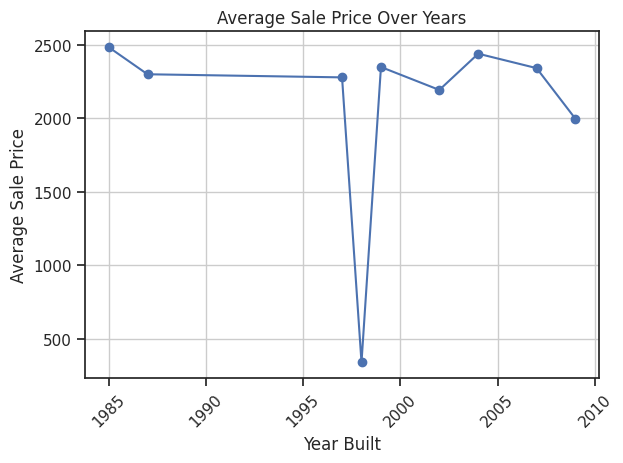

In [ ]:
average_prices = train.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean()

plt.plot(average_prices.index, average_prices.values, marker='o', linestyle='-')
plt.title('Average Sale Price Over Years')
plt.xlabel('Year Built')
plt.ylabel('Average Sale Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Show gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


We observe that, on average, sale prices remain relatively stable over the years, with minor fluctuations.But hold on tight between **1996 and 1999**, we hit a sudden drop!.One could dig deeper to find out why it happened.

<ipython-input-329-884c7265af6c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= 'Item_Fat_Content', data= train, palette='Set3' )


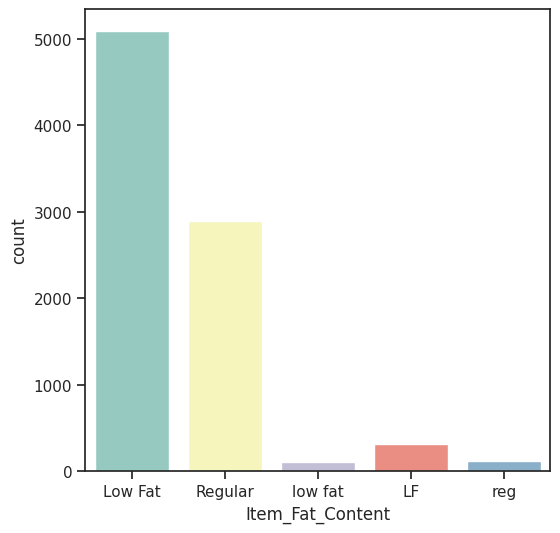

In [ ]:
#Creating Countplot for Item_Fat_Content
plt.figure (figsize= (6,6))
sns.countplot(x= 'Item_Fat_Content', data= train, palette='Set3' )
plt.show()


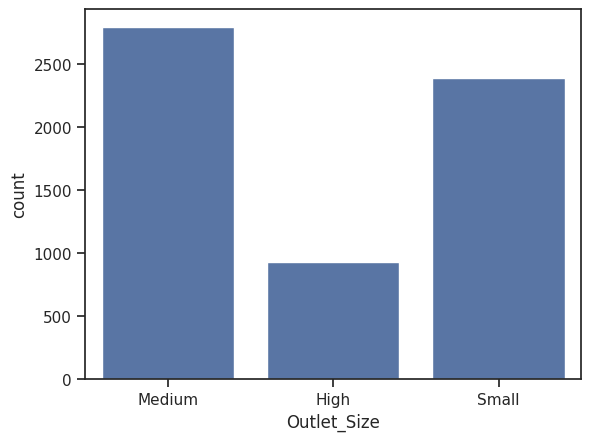

In [ ]:
sns.countplot(x='Outlet_Size', data=train)
plt.show()

<ipython-input-331-3cb334a01718>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= 'Item_Type', data= train, palette='Set3' )


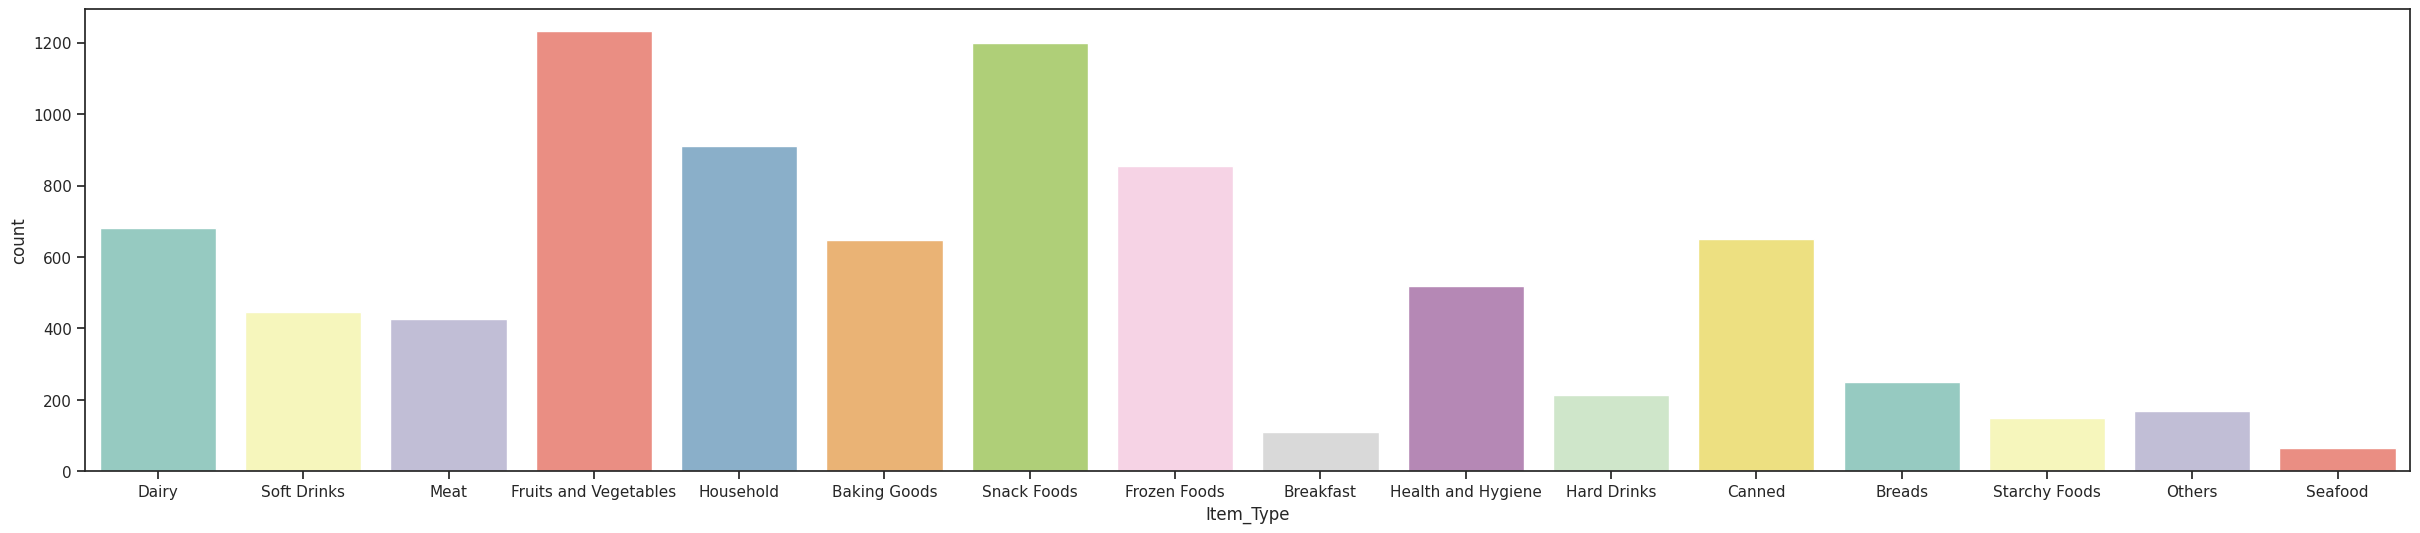

In [ ]:
#Creating Countplot for Item_Type Column
plt.figure (figsize= (30,6))
sns.countplot(x= 'Item_Type', data= train, palette='Set3' )
plt.show()

Distribution of Outlet types

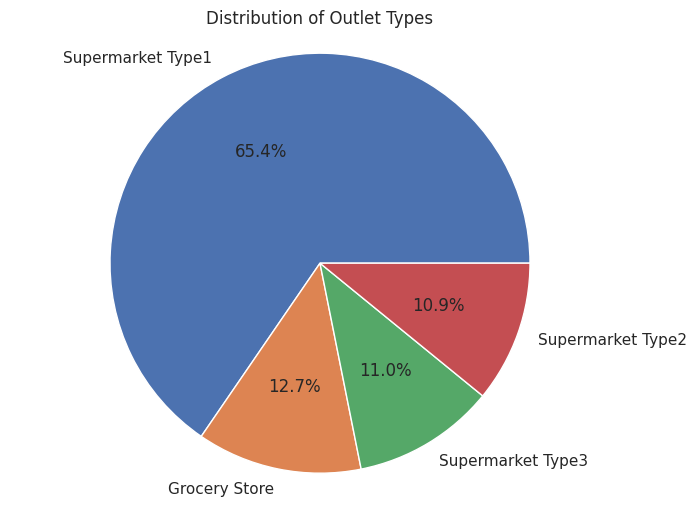

In [ ]:
outlet_type_counts = train['Outlet_Type'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(outlet_type_counts, labels=outlet_type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Outlet Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

**TOP PRICED ITEMS BY AVERAGE IN THE BIG MART DATA**


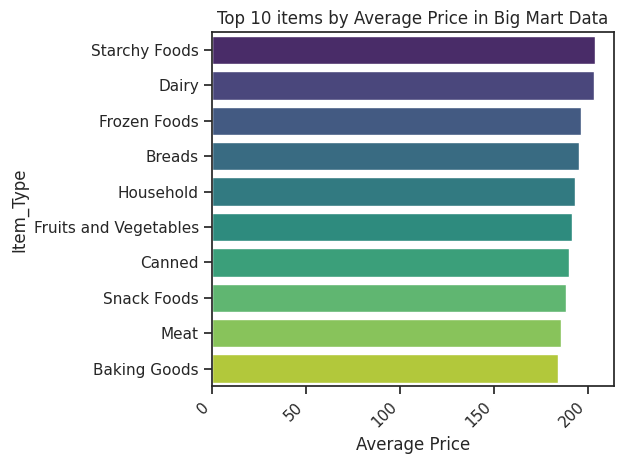

In [ ]:
filtered_Item_Type_train = train[(train['Item_MRP'] >= 130) & (train['Item_MRP'] <= 267)]
avg_price_by_Item_Type =filtered_Item_Type_train.groupby('Item_Type')['Item_MRP'].mean().sort_values(ascending=False)

# Select top Item_Type
top_10_Item_Type = avg_price_by_Item_Type.head(10)

# Plot the bar chart with top 10 Item_Type
sns.barplot(y=top_10_Item_Type.index, x=top_10_Item_Type.values,hue=top_10_Item_Type.index,palette='viridis')
plt.title("Top 10 items by Average Price in Big Mart Data")
plt.xlabel('Average Price')
plt.ylabel('Item_Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insight:**
It appears that starchy foods have claimed the top spot in average prices, closely followed by dairy products.

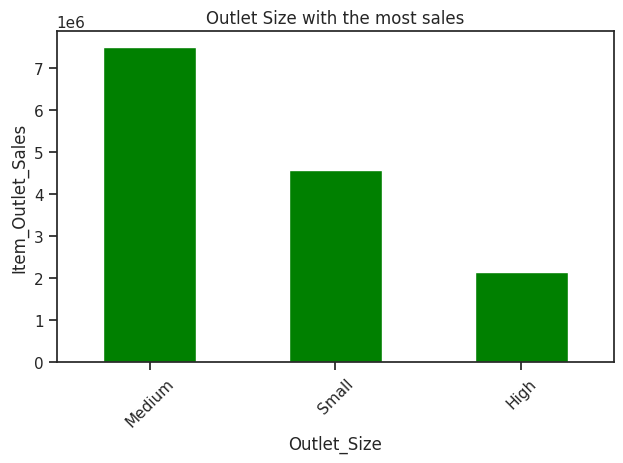

In [ ]:
revenue_by_outletsizes = train.groupby('Outlet_Size')['Item_Outlet_Sales'].sum()
top_ten_outletsizes = revenue_by_outletsizes.sort_values(ascending=False).head(10)

top_ten_outletsizes.plot(kind='bar', color='green')
plt.title('Outlet Size with the most sales')
plt.xlabel('Outlet_Size')
plt.ylabel('Item_Outlet_Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**  Medium Outlet Sizes generate the most sales

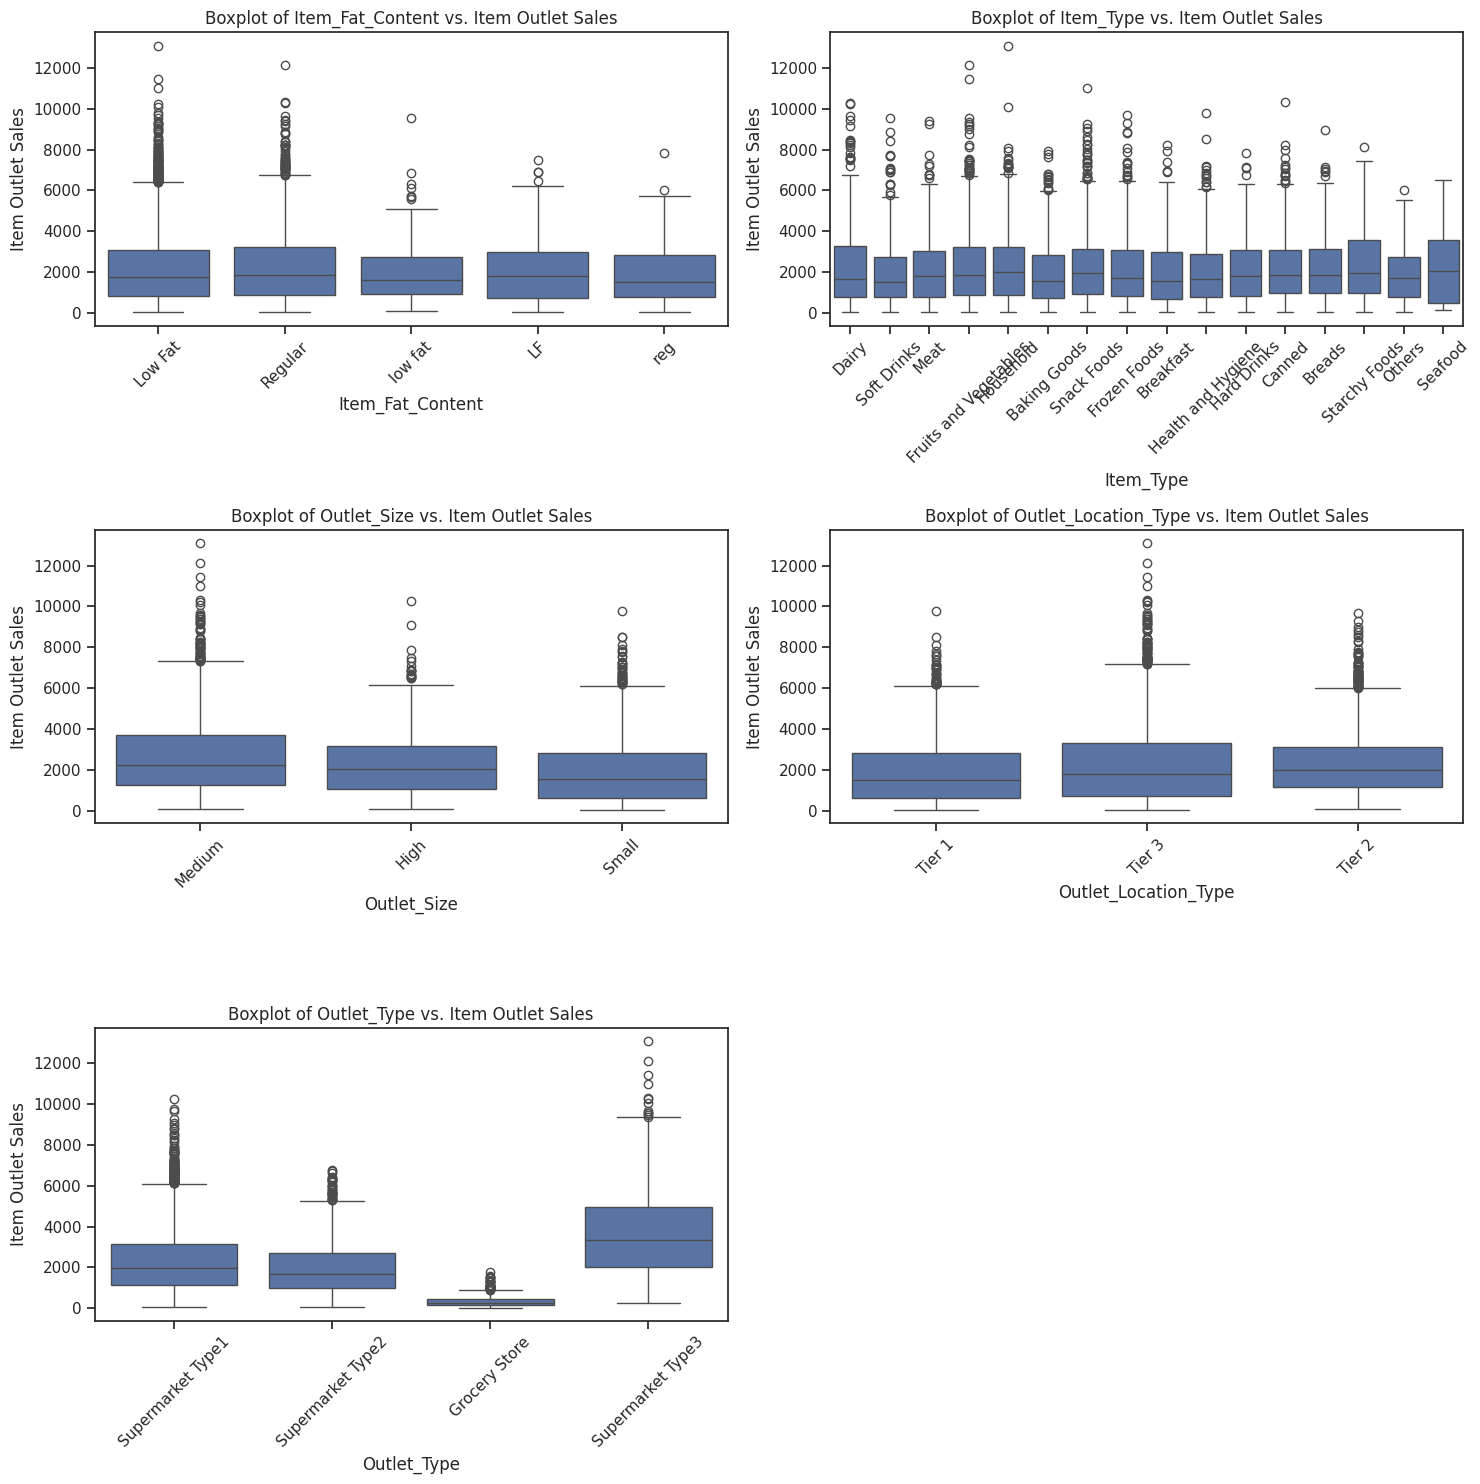

In [ ]:

# Define categorical variables excluding specific columns
exclude_columns = ['Item_Identifier', 'Outlet_Identifier']  # Add the names of columns to exclude
categorical_vars = [col for col in train.select_dtypes(include=['object']).columns if col not in exclude_columns]

# Draw boxplots for each categorical variable
rows = (len(categorical_vars) + 1) // 2
fig, axes = plt.subplots(rows, 2, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, cat_var in enumerate(categorical_vars):
    sns.boxplot(x=cat_var, y='Item_Outlet_Sales', data=train, ax=axes[i])
    axes[i].set_title(f'Boxplot of {cat_var} vs. Item Outlet Sales')
    axes[i].set_xlabel(cat_var)
    axes[i].set_ylabel('Item Outlet Sales')
    axes[i].tick_params(axis='x', rotation=45)

# Hide empty subplots
for i in range(len(categorical_vars), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


 When analyzing our data, we've found that outlet type strongly influences sales, with 'Grocery Store' outlets typically having lower sales compared to 'Supermarket Type 3'. Additionally, location type and outlet size play significant roles in sales dynamics, while variations in product fat content show minor effects on sales.

## **Data Preprocessing**

**Handling missing data**

In [ ]:
missing=train.isnull().sum()
missing

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# Fill missing values in 'Item_Weight' with mean
train['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace=True)

# Fill missing values in 'Outlet_Size' with mode
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace=True)

# Check if missing values are filled
print(train.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [ ]:
train.duplicated().sum()

0

In [ ]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [ ]:
# Replace variations with standardized labels
train['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}, inplace=True)


In [ ]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
for column in train.columns:
    if train[column].dtype == 'object':
        unique_values = train[column].unique()
        print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'Item_Identifier': ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Unique values in column 'Item_Fat_Content': ['Low Fat' 'Regular']
Unique values in column 'Item_Type': ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Unique values in column 'Outlet_Identifier': ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Unique values in column 'Outlet_Size': ['Medium' 'High' 'Small']
Unique values in column 'Outlet_Location_Type': ['Tier 1' 'Tier 3' 'Tier 2']
Unique values in column 'Outlet_Type': ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [ ]:
from sklearn.preprocessing import LabelEncoder
ordinal_cols=['Item_Type','Outlet_Identifier','Outlet_Size','Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Type']

# Create a copy of the train DataFrame
encoded_df = train.copy()
# Label encoding for ordinal variables
label_encoder = LabelEncoder()
for col in ordinal_cols:
    encoded_df[col] = label_encoder.fit_transform(encoded_df[col])

In [ ]:
encoded_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,FDX07,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,NCD19,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [ ]:
columns_to_drop = ["Item_Outlet_Sales","Item_Identifier"]
X = encoded_df.drop(columns_to_drop, axis=1)
y=encoded_df.Item_Outlet_Sales

In [ ]:
X.head(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,0,0.016047,4,249.8092,9,1999,1,0,1
1,5.92,1,0.019278,14,48.2692,3,2009,1,2,2
2,17.50,0,0.016760,10,141.6180,9,1999,1,0,1
3,19.20,1,0.000000,6,182.0950,0,1998,1,2,0
4,8.93,0,0.000000,9,53.8614,1,1987,0,2,1


In [ ]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

Splitting the data into Training data & Testing Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 10) (6818, 10) (1705, 10)


Machine Learning Model Training

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
models = [LinearRegression, RandomForestRegressor, GradientBoostingRegressor]
mae_scores = []
mse_scores = []
rmse_scores = []
r2_scores = []

for model in models:
    regressor = model().fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    mae_scores.append(mean_absolute_error(y_test, y_pred))
    mse_scores.append(mean_squared_error(y_test, y_pred))
    rmse_scores.append(mean_squared_error(y_test, y_pred, squared=False))
    r2_scores.append(r2_score(y_test, y_pred))

In [ ]:
regression_metrics_df = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest Regressor", "GradientBoostingRegressor"],
    "Mean Absolute Error": mae_scores,
    "Mean Squared Error": mse_scores,
    "Root Mean Squared Error": rmse_scores,
    "R-squared (R2)": r2_scores
})

regression_metrics_df.set_index('Model', inplace=True)
regression_metrics_df

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R-squared (R2)
Model,,,,
Linear Regression,938.337655,1.559050e+06,1248.619192,0.494975
Random Forest Regressor,825.627571,1.395269e+06,1181.215026,0.548029
GradientBoostingRegressor,787.205722,1.274503e+06,1128.938852,0.587149


Based on these results, the Gradient Boosting model has the lowest mean RMSE and the highest R2 score. Therefore, we will choose the Gradient Boosting model as it appears to perform the best among the models evaluated.

In [ ]:
gb_model = GradientBoostingRegressor()

In [ ]:
gb_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
X_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
7173,11.800000,1,0.057422,10,149.9366,8,1997,2,0,1
3315,12.857645,0,0.000000,0,100.1384,5,1985,1,2,3
5932,7.725000,0,0.047783,3,249.1092,8,1997,2,0,1
7872,10.500000,0,0.052555,5,89.6830,8,1997,2,0,1
5946,12.857645,1,0.235859,13,46.1402,4,1985,2,0,0
...,...,...,...,...,...,...,...,...,...,...
1099,7.235000,0,0.099963,13,193.8452,8,1997,2,0,1
2514,19.350000,0,0.118103,13,224.8088,8,1997,2,0,1
6637,18.700000,1,0.092096,10,183.3292,2,2007,1,1,1
2575,8.880000,0,0.086957,7,152.5682,7,2002,1,1,1


Visualize our gradient boost model

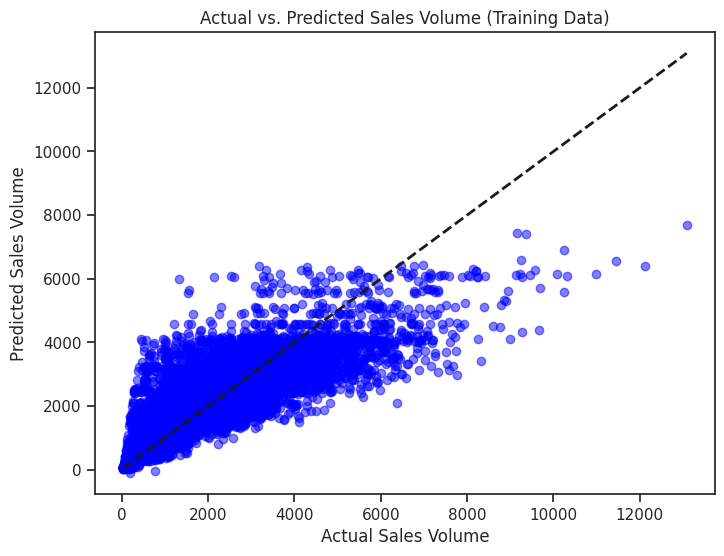

In [ ]:
# Make predictions on the training data
predictions_train = gb_model.predict(X_train)

# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_train, predictions_train, color='blue', alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Actual Sales Volume')
plt.ylabel('Predicted Sales Volume')
plt.title('Actual vs. Predicted Sales Volume (Training Data)')
plt.show()



**Predict on new data**

In [ ]:
# Load the new data into a DataFrame
new_data = pd.DataFrame({
    'Item_Weight': [12.8],
    'Item_Fat_Content': ['Regular'],
    'Item_Visibility': [0.113854],
    'Item_Type': ['Breads'],
    'Item_MRP': [141.5838],
    'Outlet_Identifier': ['OUT046'],
    'Outlet_Establishment_Year': [1997],
    'Outlet_Size': ['Small'],
    'Outlet_Location_Type': ['Tier 1'],
    'Outlet_Type': ['Supermarket Type1']
})


In [ ]:

ordinal_cols=['Item_Type','Outlet_Identifier','Outlet_Size','Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Type']

label_encoder = LabelEncoder()
for col in ordinal_cols:
    new_data[col] = label_encoder.fit_transform(new_data[col])

In [ ]:
predictions = gb_model.predict(new_data)

print("The Volume of sales prediction of our new_data is:", predictions)


The Volume of sales prediction of our new_data is: [388.93731543]
